In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=13)  #create a randam dataset

In [3]:
# let's see how the dataset elements look like
print(X[5])
print (y[5])

[0.24492786]
-11.930861191817574


In [4]:
myVar = pd.DataFrame(X, y)
print(myVar.head())

                   0
 33.762864  1.065766
-68.698999 -2.293368
-25.266104  0.349736
 14.069119  0.359658
-12.283382 -0.418158


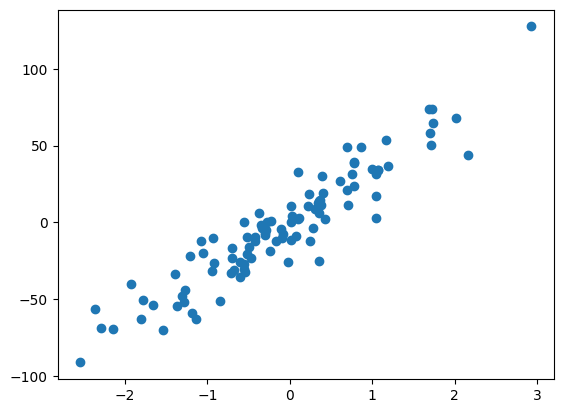

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
#We can then place our line of best fit onto the plot along with all of the data points.

reg = LinearRegression(fit_intercept=True)
reg.fit(X, y)

LinearRegression()

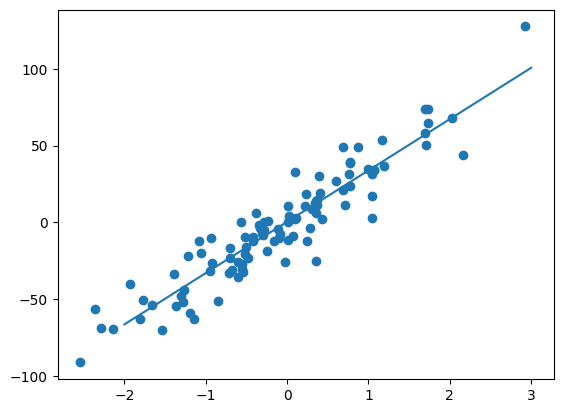

In [7]:
xfit = np.linspace(start=-2, stop =3)
yfit = reg.predict(xfit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(xfit, yfit)

In [8]:
print("Slope:    ", reg.coef_[0])
print("Intercept:", reg.intercept_)
Slope:     38.59919763874736
Intercept: 0.58097147266488

Slope:     33.40073217566135
Intercept: 0.405862257479229


In [9]:
# y = wx + b  -or-  y = mx + b
def predict(x):
    w = reg.coef_[0]
    b = reg.intercept_
    y = w*x + b
    return y

print("Predict y For 3:     ", predict(3))
print("Predict y For -1.5: ", predict(-1.5))

Predict y For 3:      100.6080587844633
Predict y For -1.5:  -49.695236006012806


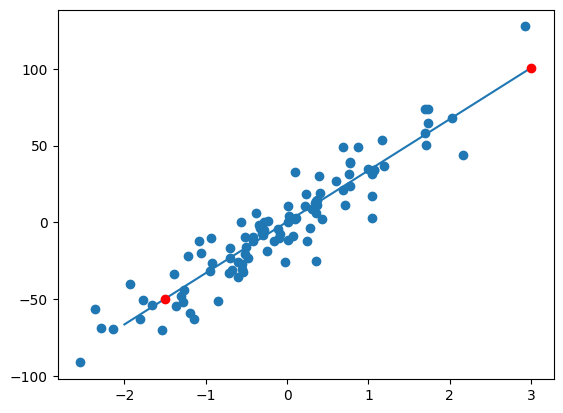

In [10]:
plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.plot(3, predict(3), 'ro')
plt.plot(-1.5, predict(-1.5), 'ro')

In [11]:
import statsmodels.api as sm


In [12]:
results = sm.OLS(y,X).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              696.6
Date:                Thu, 08 Sep 2022   Prob (F-statistic):                    1.35e-46
Time:                        15:45:26   Log-Likelihood:                         -399.79
No. Observations:                 100   AIC:                                      801.6
Df Residuals:                      99   BIC:                                      804.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            33.3629      1.264     26.394      0.000      30.855      35.871
==============================================================================
Omnibus:                        0.902   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                0.549
Skew:                          -0.167   Prob(JB):                        0.760
Kurtosis:                       3.141   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Now let's see how good our model is from th eprovide regression results 
# As you can see above, we have 3 tables of interest; the first one is the model summary, the second one is the coefficient table, 
# and the third table provides some additional tests. 

# We will start with the coefficients table.
# We are interetsed in the constant value 0.5810 which means b = 0.5810 in the equation y = mx + b or y = b + mx
# Looking below it, we notice the other coefficient is 38.5992. This is our m. These are the only two numbers we need to 
# define the regression equation.
# Therefore,   ŷ= 0.5810 + 38.5992 * x1.

##These results confirms the values we got earlier in our program

In [14]:
#The Standard Errors
#What about the other cells in the table?

#The standard errors show the accuracy of prediction for each variable.

#The lower the standard error, the better the estimate!  1.497 is the standard error here 


In [15]:
#The T-Statistic

#The next two values are a T-statistic and its P-value.

#This test asks the question, is this a useful variable? Does it help us explain the variability we have in this case?;
# in other words, is x1 a useful variable?
#The answer is contained in the P-value column.  The value of interest is 0.000

# a P-value below 0.05 means that the variable is significant.

In [16]:
#What does this mean for our linear regression example?

#Well, it simply tells us that x1 value is a significant variable when predicting y.


In [17]:
# The F-statistic

# The last measure we will discuss is the F-statistic in the first table.
# the F-statistic value is 604 and its P-value  is 1.09e-43

# As you can see, the P-value is really low – it is virtually 0.000. We say the overall model is significant.


# Remember, the lower the F-statistic, the closer to a non-significant model.